In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
import os
os.chdir('D:\\Graduation project') #set the new directory 


In [3]:
balance_data = pd.read_excel('D:\Data mining\Python\model.xlsx')

In [4]:
print ("Dataset Lenght:: "), len(balance_data)
print ("Dataset Shape:: "), balance_data.shape

Dataset Lenght:: 
Dataset Shape:: 


(None, (2528, 14))

In [5]:
print ("Dataset:: ")
balance_data.head()

Dataset:: 


,Effect of the environment on health = 1,Health status = 1,Health status = 3,gov = Cairo,gov = Giza,Air pollution,Water,Dirty_streets_garbage,Noise,Sewage_sanitation,Fruits_vegetablesPesticides,age,son_gender,Respiratory problems
0,1,1,0,1,0,1,1,0,1,0,0,24,1,0
1,1,1,0,1,0,1,0,0,1,0,0,22,1,1
2,1,1,0,1,0,0,0,1,0,0,0,24,1,0
3,1,1,0,1,0,1,1,0,0,0,0,25,0,1
4,1,0,0,1,0,1,0,1,0,1,0,26,0,1


In [6]:
balance_data.columns

Index(['Effect of the environment on health = 1', 'Health status  = 1',
       'Health status  = 3', 'gov = Cairo', 'gov = Giza', 'Air pollution',
       'Water', 'Dirty_streets_garbage', 'Noise', 'Sewage_sanitation',
       'Fruits_vegetablesPesticides', 'age', 'son_gender',
       'Respiratory problems'],
      dtype='object')

In [7]:
X = balance_data.values[:,0:13]
Y = balance_data.values[:,-1]

In [8]:
X.shape

(2528, 13)

In [9]:
Y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=1)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=100)

In [13]:
y_pred = clf_entropy.predict(X_train)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [14]:
print ("Accuracy is "), accuracy_score(y_train,y_pred)*100

Accuracy is 


(None, 81.74109666478236)

In [15]:
from sklearn.metrics import roc_curve,roc_auc_score

In [16]:

r_probs = [0 for _ in range(len(y_train))]
D_probs = clf_entropy.predict_proba(X_train)

In [17]:

D_probs = D_probs[:, 1]

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

In [19]:
r_auc = roc_auc_score(y_train, r_probs)
D_auc = roc_auc_score(y_train, D_probs)

In [20]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision tree: AUROC = %.3f' % (D_auc))

Random (chance) Prediction: AUROC = 0.500
Decision tree: AUROC = 0.901


In [21]:
r_fpr, r_tpr, _ = roc_curve(y_train, r_probs)
D_fpr, D_tpr, _ = roc_curve(y_train, D_probs)

In [22]:
import matplotlib.pyplot as plt

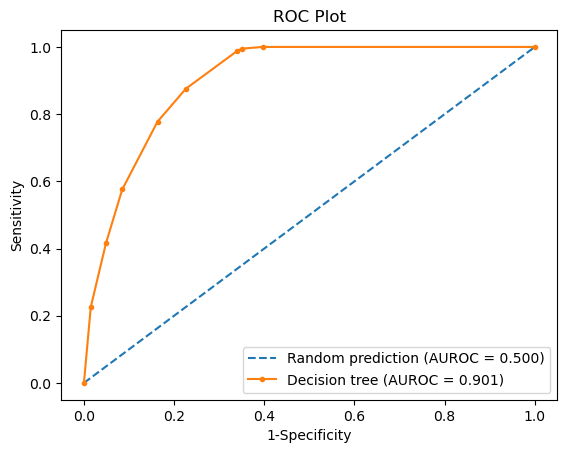

In [23]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(D_fpr, D_tpr, marker='.', label='Decision tree (AUROC = %0.3f)' % D_auc)
plt.title('ROC Plot')
# Axis labels
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [24]:
text_representation = tree.export_text(clf_entropy)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_9 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_7 >  0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_11 <= 20.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_11 >  20.50
|   |   |   |   |--- class: 1
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1



In [25]:
fig = plt.figure(figsize=(200, 60))
_ = tree.plot_tree(clf_entropy, 
                   feature_names=balance_data.columns,
                   class_names=['0','1'],
                   filled=True)

In [26]:
fig.savefig("decistion_tree.png")

In [27]:
import os
os.chdir('D:\\Graduation project') #set the new directory 




In [28]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics

In [29]:
recall_score(y_train,y_pred)

0.7775862068965518

In [30]:
precision_score(y_train,y_pred)

0.6992248062015504

In [31]:
cm=metrics.confusion_matrix(y_train, y_pred)

In [32]:
cm

array([[995, 194],
       [129, 451]], dtype=int64)

In [33]:
specificity=cm[0,0]/(cm[0,0]+cm[0,1])

In [34]:
specificity

0.8368376787216149

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Replace X_train and y_train with your own training data

# Create the classifier object
clf = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [2,3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'min_samples_leaf': [2,3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Access the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}
Best score: 0.8157231798466734


In [36]:
importances_sk = clf_entropy.feature_importances_

Effect of the environment on health = 1
Feature: 0, Score: 0.77405
Health status  = 1
Feature: 1, Score: 0.01708
Health status  = 3
Feature: 2, Score: 0.00000
gov = Cairo
Feature: 3, Score: 0.00000
gov = Giza
Feature: 4, Score: 0.00000
Air pollution
Feature: 5, Score: 0.09422
Water
Feature: 6, Score: 0.00000
Dirty_streets_garbage
Feature: 7, Score: 0.03798
Noise
Feature: 8, Score: 0.06179
Sewage_sanitation
Feature: 9, Score: 0.00471
Fruits_vegetablesPesticides
Feature: 10, Score: 0.00000
age
Feature: 11, Score: 0.01016
son_gender
Feature: 12, Score: 0.00000


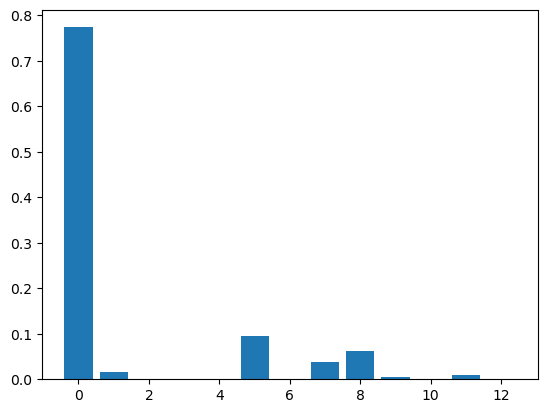

In [45]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
model=clf_entropy
importance = model.feature_importances_
colnames=list(balance_data.columns)
# summarize feature importance
for i,v in enumerate(importance):
    print(colnames[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [40]:
balance_data.head()

,Effect of the environment on health = 1,Health status = 1,Health status = 3,gov = Cairo,gov = Giza,Air pollution,Water,Dirty_streets_garbage,Noise,Sewage_sanitation,Fruits_vegetablesPesticides,age,son_gender,Respiratory problems
0,1,1,0,1,0,1,1,0,1,0,0,24,1,0
1,1,1,0,1,0,1,0,0,1,0,0,22,1,1
2,1,1,0,1,0,0,0,1,0,0,0,24,1,0
3,1,1,0,1,0,1,1,0,0,0,0,25,0,1
4,1,0,0,1,0,1,0,1,0,1,0,26,0,1


In [38]:
balance_data.columns

Index(['Effect of the environment on health = 1', 'Health status  = 1',
       'Health status  = 3', 'gov = Cairo', 'gov = Giza', 'Air pollution',
       'Water', 'Dirty_streets_garbage', 'Noise', 'Sewage_sanitation',
       'Fruits_vegetablesPesticides', 'age', 'son_gender',
       'Respiratory problems'],
      dtype='object')